In [ ]:
!pip install fitter

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [ ]:
import os
print(os.getcwd())

from google.colab import drive

drive.mount('/content/drive') # mount the drive
cwd = 'drive/My Drive/Data_Viz_Lab'  # set the current working directory


/content/drive/MyDrive/Data_Viz_Lab
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('timedata0.csv')


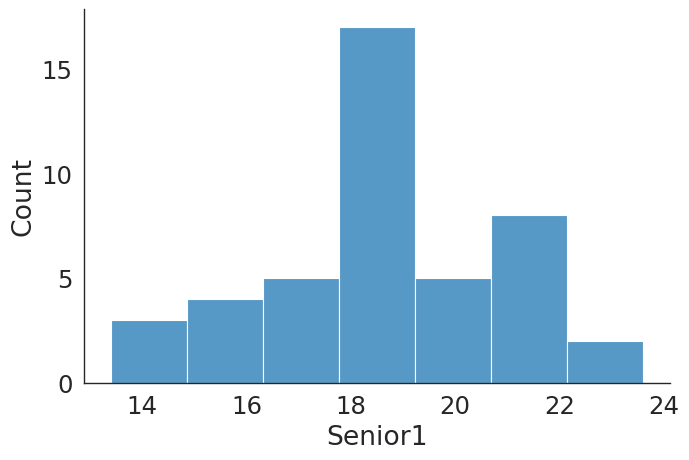

In [ ]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=df,x='Senior1', kind="hist", bins = 7, aspect = 1.5)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
triang,1.751573,519.507772,524.860341,inf,0.090608,0.831094
norm,1.773257,530.551310,534.119689,inf,0.073778,0.955972
beta,1.813381,502.831391,509.968150,inf,0.100835,0.724347
uniform,1.853717,490.722671,494.291050,inf,0.130781,0.404353
expon,2.109896,552.133490,555.701869,inf,0.273852,0.002086


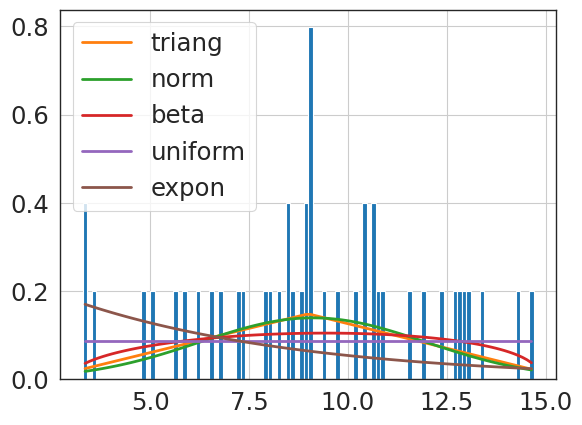

In [ ]:

from fitter import Fitter
f = Fitter(df['Receptionist1'], distributions=["expon", "norm", "beta", "uniform", "triang"])
f.fit()
f.summary()




         sumsquare_error         aic         bic  kl_div  ks_statistic  \
triang          1.645304  521.038356  526.390925     inf      0.083493   
norm            1.660129  533.113734  536.682113     inf      0.085159   
beta            1.687302  511.696097  518.832856     inf      0.102421   
uniform         1.774227  490.722671  494.291050     inf      0.131978   
expon           2.023578  552.110856  555.679236     inf      0.278484   

         ks_pvalue  
triang    0.893774  
norm      0.880243  
beta      0.706790  
uniform   0.393241  
expon     0.001648  
         sumsquare_error         aic         bic  kl_div  ks_statistic  \
triang          1.751573  519.507772  524.860341     inf      0.090608   
norm            1.773257  530.551310  534.119689     inf      0.073778   
beta            1.813381  502.831391  509.968150     inf      0.100835   
uniform         1.853717  490.722671  494.291050     inf      0.130781   
expon           2.109896  552.133490  555.701869     inf   

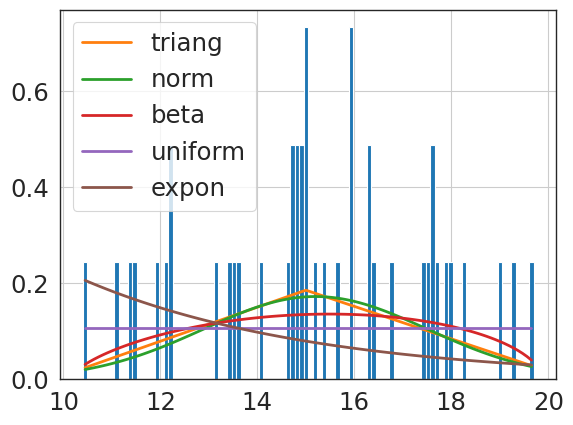

In [ ]:
import pandas as pd
from fitter import Fitter

for column in df.columns:
    data = df[column]
    f = Fitter(data, distributions=["expon", "norm", "beta", "uniform", "triang"])
    f.fit()
    print(f.summary())






In [ ]:
import pandas as pd
import numpy as np

param_summary = pd.DataFrame(columns=['Variable', 'Mode', 'Minimum (𝑎)', 'Maximum (𝑏)'])

for column in df.columns:
    data = df[column]

    mode = float(np.argmax(np.bincount(data)))

    min_value = min(data)
    max_value = max(data)

    param_summary = param_summary.append({'Variable': column, 'Mode': mode, 'Minimum (𝑎)': min_value, 'Maximum (𝑏)': max_value}, ignore_index=True)

print(param_summary)



          Variable  Mode  Minimum (𝑎)  Maximum (𝑏)
0   Waiting_Time_R   9.0          3.4         14.8
1    Receptionist1   8.0          3.3         14.7
2    Receptionist2   8.0          3.4         14.6
3  Waiting_Time_MA  17.0          5.3         29.5
4          Trainee  24.0         20.3         29.6
5           New_MA  21.0         18.4         24.6
6          Senior1  18.0         13.4         23.6
7          Senior2  15.0         10.2         19.6
8   Waiting_Time_D  13.0          5.4         19.6
9           Doctor  15.0         10.4         19.7


<ipython-input-116-e49319ceb1d6>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_summary = param_summary.append({'Variable': column, 'Mode': mode, 'Minimum (𝑎)': min_value, 'Maximum (𝑏)': max_value}, ignore_index=True)
<ipython-input-116-e49319ceb1d6>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_summary = param_summary.append({'Variable': column, 'Mode': mode, 'Minimum (𝑎)': min_value, 'Maximum (𝑏)': max_value}, ignore_index=True)
<ipython-input-116-e49319ceb1d6>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  param_summary = param_summary.append({'Variable': column, 'Mode': mode, 'Minimum (𝑎)': min_value, 'Maximum (𝑏)': max_value}, ignore_index=True)
<ipython-input-116-e49319ceb1d6>:21: FutureWarning: 